In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing

## Predspracovanie datasetov

Na predspracovanie oboch datasetov bolo nutné premiestniť všetky potrebné funkcie a triedy, vytvorené v predchádzajúcej
fáze projektu do novovytvoreného súboru preprocessing.py. V danom súbore sme vytvorili funkciu, ktorá ako argument berie
.csv súbory pre osobné a aj medicínske dáta, spojí ich do jedného datasetu, ktorý následne upraví pomocou našej
pipeline. Po predspracovaní nám vráti upravený dataset, s ktorým už môžeme ďalej pracovať. Túto funkciu zavoláme pre
trénovací, ako aj validačný dataset.

Ako môžeme nižšie vidieť, proces predspracovania prebehol správne, oba datasety obsahujú rovnaké atribúty, majú všade
len jeden dátový typ a sú bez akýchkoľvek chýbajúcich hodnôt.

In [122]:
medical_train = pd.read_csv("dataset/other_train.csv")
personal_train = pd.read_csv("dataset/personal_train.csv")

train_data = preprocessing.preprocess_dataset(medical_train, personal_train)
train_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3924 non-null   float64
 1   sex                3924 non-null   float64
 2   kurtosis_oxygen    3924 non-null   float64
 3   pregnant           3924 non-null   float64
 4   education-num      3924 non-null   float64
 5   skewness_glucose   3924 non-null   float64
 6   mean_glucose       3924 non-null   float64
 7   std_oxygen         3924 non-null   float64
 8   capital-gain       3924 non-null   float64
 9   skewness_oxygen    3924 non-null   float64
 10  kurtosis_glucose   3924 non-null   float64
 11  final_weight       3924 non-null   float64
 12  diabetes_presence  3924 non-null   fl

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [123]:
medical_valid = pd.read_csv("dataset/other_valid.csv")
personal_valid = pd.read_csv("dataset/personal_valid.csv")

valid_data = preprocessing.preprocess_dataset(medical_valid, personal_valid)
valid_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1306 non-null   float64
 1   sex                1306 non-null   float64
 2   kurtosis_oxygen    1306 non-null   float64
 3   pregnant           1306 non-null   float64
 4   education-num      1306 non-null   float64
 5   skewness_glucose   1306 non-null   float64
 6   mean_glucose       1306 non-null   float64
 7   std_oxygen         1306 non-null   float64
 8   capital-gain       1306 non-null   float64
 9   skewness_oxygen    1306 non-null   float64
 10  kurtosis_glucose   1306 non-null   float64
 11  final_weight       1306 non-null   float64
 12  diabetes_presence  1306 non-null   fl

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

## Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

<AxesSubplot:xlabel='diabetes_presence', ylabel='kurtosis_glucose'>

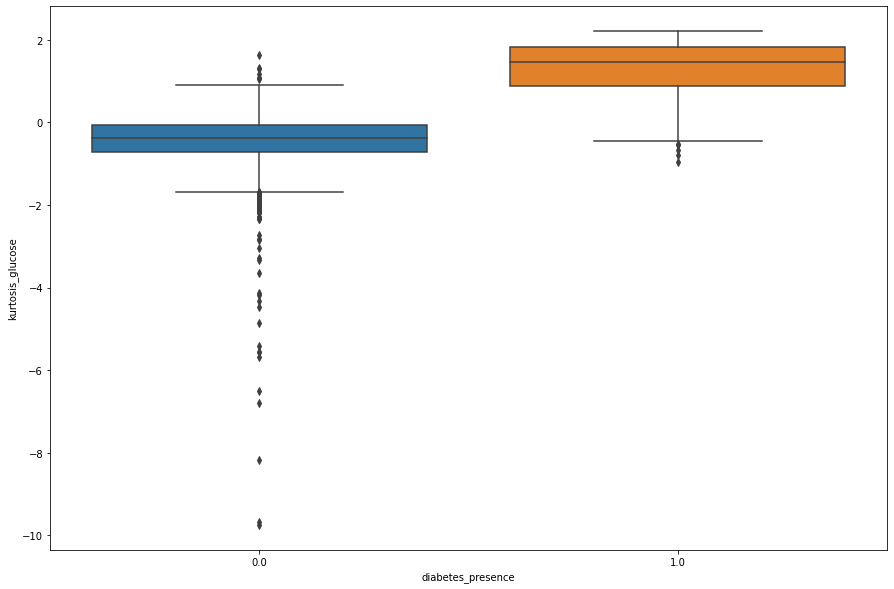

In [124]:
columns = ["kurtosis_oxygen", "skewness_oxygen", "mean_oxygen", "std_oxygen",
           "kurtosis_glucose", "skewness_glucose", "mean_glucose", "std_glucose"]

fig_b = plt.subplots(figsize = (15, 10))
sns.boxplot(y = "kurtosis_glucose", x = "diabetes_presence", data= train_data)

Následne sme vytvorili náš vlastný rozhodovací strom. Ako parametre sme mu poskytli trénovací dataset a súbor pravidiel.
Tie sú uložené v zozname, v ktorom je každé pravidlo reprezentované jedným elementom. Jednotlivé pravidlá sú taktiež
reprezentované zoznamom. Ten obsahuje atribúty, spolu s číselnou hodnotou, pomocou ktorých budeme dáta v strome rozdeľovať.
Okrem toho musí obsahovať aj operátor >, alebo <, aby sme vedeli dáta správne porovnať. Tie sú reprezentované pomocou
knižnice operator.

Jednotlivé vrcholy v strome sú vytvorené manuálne vo funkcií create_tree(). Pri tvorení nového vrcholu, ako parametre
posúvame aktuálny dataset, pravidlo (rule), podľa ktorého budeme dataset rozdeľovať a ak sa jedná o listy, tak aj
zdravotný stav pacienta (condition). V tom prípade nebude nutné dataset už daľej rozdeľovať. Ale ak aktuálny vrchol ešte
nie je list, tak sa spúšťa funkcia split_dataset(), v ktorej podľa aktuálneho pravidla určíme, ktorá časť dát pôjde do
ľavej a ktorá do pravej vetvy stromu. V našom prípade idú do ľava tie dáta, ktoré spĺňajú podmienky pravidla, do pravej
tie, čo nespĺňajú.

Po vytvorení stromu vo funkcií assign_diabetes_presence() prechádzame celým stromom, až k listom, kde výsledným dátam
priradíme hodnotu 1, ak predpokladáme, že sú chorí a 0 ak majú byť zdraví. Nami ohodnotené dáta ukladáme do premennej
categorized_data, čo je vlastne nový Pandas data frame. Ten budeme porovnávať soriginálnym datasetom, vďaka čomu budeme
môcť zistiť aké  hodnoty nadobúdajú TP, TN, FP a FN. Podľa nich vyrátame ostatné metriky a následne môžeme náš
rozhodovací strom vyhodnotiť.

In [125]:
import operator


class Node:
    def __init__(self, data, rule, condition = None):
        self.data = data
        self.condition = condition
        self.left = None
        self.right = None
        
        if condition is None:
            self.l_data, self.r_data = self.split_dataset(rule)
        else:
            self.l_data = None
            self.r_data = None
            

    def split_dataset(self, rule):
        l_data = None

        if len(rule) == 1:
            if rule[0][1] == operator.lt:
                l_data = self.data[self.data[rule[0][0][0]] < rule[0][0][1]]
            else:
                l_data = self.data[self.data[rule[0][0][0]] > rule[0][0][1]]

        elif len(rule) == 2:
            if rule[0][1] == operator.lt and rule[1][1] == operator.lt:
                l_data = self.data[(self.data[rule[0][0][0]] < rule[0][0][1]) & (self.data[rule[1][0][0]] < rule[1][0][1])]

            if rule[0][1] == operator.gt and rule[1][1] == operator.gt:
                l_data = self.data[(self.data[rule[0][0][0]] > rule[0][0][1]) & (self.data[rule[1][0][0]] > rule[1][0][1])]

            if rule[0][1] == operator.lt and rule[1][1] == operator.gt:
                l_data = self.data[(self.data[rule[0][0][0]] < rule[0][0][1]) & (self.data[rule[1][0][0]] > rule[1][0][1])]

            if rule[0][1] == operator.gt and rule[1][1] == operator.lt:
                l_data = self.data[(self.data[rule[0][0][0]] > rule[0][0][1]) & (self.data[rule[1][0][0]] < rule[1][0][1])]
                
        r_data = pd.concat([self.data, l_data]).drop_duplicates(keep = False)
        return l_data, r_data


In [126]:
class Tree:
    def __init__(self, data, rules):
        self.data = data
        self.rules = rules
        self.categorized_data = pd.DataFrame(columns = self.data.columns)
        self.root = Node(self.data, self.rules[0])

        # binary classifiers
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0


    def create_tree(self, root):
        # left branch
        root.left = Node(root.l_data, self.rules[2])
        root.left.left = Node(root.left.l_data, self.rules[1])
        root.left.right = Node(root.left.r_data, [], False)
        root.left.left.left = Node(root.left.left.l_data, [], True)
        root.left.left.right = Node(root.left.left.r_data, [], False)

        # right branch
        root.right = Node(root.r_data, self.rules[4])
        root.right.left = Node(root.right.l_data, [], True)
        root.right.right = Node(root.right.r_data, self.rules[3])
        root.right.right.left = Node(root.right.right.l_data, [], True)
        root.right.right.right = Node(root.right.right.r_data, [], False)


    def assign_diabetes_presence(self, curr):
        
        if curr.left is None:
            to_add = curr.data.copy()
            if curr.condition == True:
                to_add["diabetes_presence"] = 1
            else:
                to_add["diabetes_presence"] = 0
            self.categorized_data = pd.concat([self.categorized_data, to_add])
            return

        if curr.right is None:
            to_add = curr.data.copy()
            if curr.condition == True:
                to_add["diabetes_presence"] = 1
            else:
                to_add["diabetes_presence"] = 0
            self.categorized_data = pd.concat([self.categorized_data, to_add])
            return

        self.assign_diabetes_presence(curr.left)
        self.assign_diabetes_presence(curr.right)


    def get_binary_classification(self, row):
        
        to_compare = self.categorized_data.loc[self.categorized_data.index.values == row.name]

        if to_compare["diabetes_presence"].values == 1 and row["diabetes_presence"] == 1:
            self.tp += 1
        if to_compare["diabetes_presence"].values == 0 and row["diabetes_presence"] == 0:
            self.tn += 1
        if to_compare["diabetes_presence"].values == 1 and row["diabetes_presence"] == 0:
            self.fp += 1
        if to_compare["diabetes_presence"].values == 0 and row["diabetes_presence"] == 1:
            self.fn += 1


    def calculate_accuracy(self):
        return (self.tp + self.tn) / len(self.data)

    def calculate_precision(self):
        return self.tp / (self.tp + self.fp)

    def calculate_recall(self):
        return self.tp / (self.tp + self.fn)

    def calculate_f1_score(self):
        p = self.calculate_precision()
        r = self.calculate_recall()
        return (2 * p * r) / (p + r)


    def print_metrics(self):
        
        self.data.apply(lambda x: self.get_binary_classification(x), axis = 1)
        
        print("Number of rows: ", len(self.data))
        print("True positive: ", self.tp)
        print("True negative: ", self.tn)
        print("False positive: ", self.fp)
        print("False negative: ", self.fn)
        
        print("\nAccuracy: ", self.calculate_accuracy())
        print("Precision: ", self.calculate_precision())
        print("Recall: ", self.calculate_recall())
        print("F1 score: ", self.calculate_f1_score())
        

In [129]:
rules = [ [(("skewness_oxygen", -1), operator.lt)],
          [(("kurtosis_glucose", 0.75), operator.gt)],
          [(("skewness_glucose", 0.), operator.gt)],
          [(("mean_glucose", -0.85), operator.lt)],
          [(("skewness_glucose", 0.9), operator.gt), (("kurtosis_glucose", 0.6), operator.gt)]]

my_tree = Tree(train_data, rules)
my_tree.create_tree(my_tree.root)
my_tree.assign_diabetes_presence(my_tree.root)
my_tree.print_metrics()

Number of rows:  3924
True positive:  798
True negative:  2878
False positive:  42
False negative:  206

Accuracy:  0.9367991845056065
Precision:  0.95
Recall:  0.7948207171314741
F1 score:  0.8655097613882863
